Shriyansh Singh

CECS 457 Sec 01

**Project 1:** Simple Sleep Advisor

Preprocessing the data before loading and splitting the dataset

In [17]:
import pandas as pd

# Loading up the dataset
data = pd.read_csv('sleep_patterns.csv')

def time_to_mins(time_str):
    """
    Converts time strings to minutes
    """
    hours, minutes = map(int, time_str.split(':'))
    return (hours * 60) + minutes

# Converting the time columns to minutes
data['wake_time_minutes'] = data['wake_time'].apply(time_to_mins)
data['bedtime_minutes'] = data['recommended_bedtime'].apply(time_to_mins)

# Handles bedtimes after midnight (e.g., if wake time is 07:00, bedtime might be 23:00 previous day)
data.loc[data['bedtime_minutes'] > data['wake_time_minutes'], 'bedtime_minutes'] -= 24 * 60

##### Loading and Splitting dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

# Separating features(X) and targets(y)
X = data[['wake_time_minutes']]
y = data['bedtime_minutes']

# Splitting the data that is randomized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(800, 1)

In [20]:
X_train.head()

,wake_time_minutes
29,265
535,399
695,434
557,404
836,471


Creating a Model to provide the recommended bed time based on the wake-up time

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
    
# Calling the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

Evaluating the Model using the test data

In [22]:
# Making predictions on the test set
y_pred = model.predict(X_test)
# Calculating the Mean Absolute Error
mae = np.mean(abs(y_pred - y_test))
print(f'Mean Absolute Error: {mae:.2f} minutes')

Mean Absolute Error: 15.64 minutes


Visualizing the performance of the model

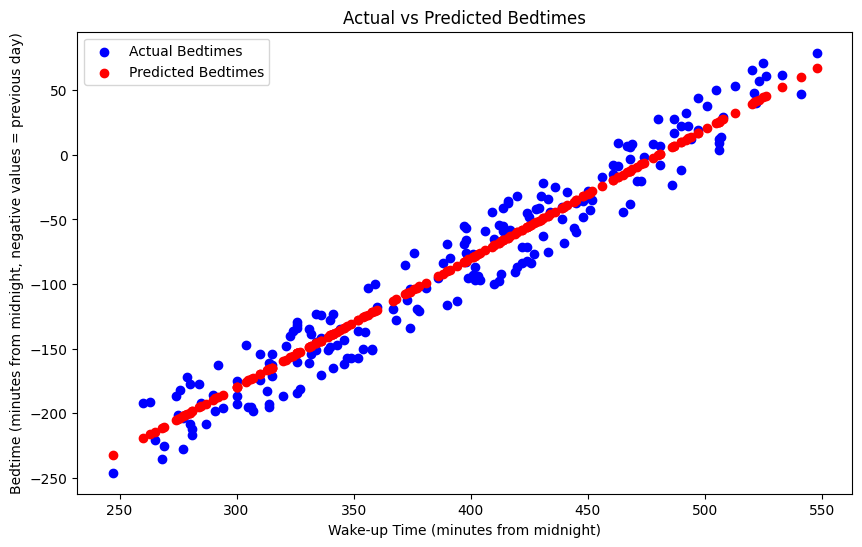

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Bedtimes')
plt.scatter(X_test, y_pred, color='red', label='Predicted Bedtimes')
plt.xlabel('Wake-up Time (minutes from midnight)')
plt.ylabel('Bedtime (minutes from midnight, negative values = previous day)')
plt.legend()
plt.title('Actual vs Predicted Bedtimes')
plt.savefig('actual_vs_predicted_bedtimes.png')
plt.show()

Creating a input form to get the wake-up time from the user and provide the recommended bed time

In [24]:
def mins_to_time(mins):
    """
    Converts minutes to time strings
    """
    # Handling negative values
    if mins < 0:
        mins += 24 * 60
    
    # Getting the remaining minutes after converting to hours
    mins = int(mins % (24 * 60))

    # Converting the result to time format
    hrs, mins = divmod(mins, 60)

    # Handling AM/PM for the 12-hour clock
    am_or_pm = "AM" if hrs < 12 else "PM"
    hrs = int(hrs % 12)
    if hrs == 0:
        hrs = 12

    return f'{hrs}:{mins} {am_or_pm}'

def recommend_bedtime(wake_time_str, model):
    """
    Recommends a bedtime based on the wake time
    """
    # Converting the wake time to minutes
    wake_time = time_to_mins(wake_time_str)
    # Reshaping the wake time to fit the model
    wake_time_reshaped = np.array([wake_time]).reshape(-1, 1)
    # Predicting the bedtime through the model
    bedtime_mins = model.predict(wake_time_reshaped)
    # Converting th result back to time format
    predicted_bedtime = mins_to_time(bedtime_mins[0])

    return predicted_bedtime

# Setting up the user interface
user_input = input("Enter your preferred wake time (HH:MM): ")
print(f"Recommended bedtime for you is {recommend_bedtime(user_input, model)}")

Recommended bedtime for you is 11:29 PM


c:\Users\Shriyansh Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
